<a href="https://colab.research.google.com/github/sanvidhaharibhakta/ML_Projects/blob/main/Face_Mask_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install kaggle

In [9]:
!mikdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

/bin/bash: line 1: mikdir: command not found


In [12]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 93% 151M/163M [00:01<00:00, 131MB/s]
100% 163M/163M [00:01<00:00, 146MB/s]


In [13]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("THE DATASET IS EXTRACTED")

THE DATASET IS EXTRACTED


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [15]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3665.jpg', 'with_mask_2620.jpg', 'with_mask_361.jpg', 'with_mask_1572.jpg', 'with_mask_1786.jpg']
['with_mask_2976.jpg', 'with_mask_1916.jpg', 'with_mask_1509.jpg', 'with_mask_3368.jpg', 'with_mask_695.jpg']


In [16]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3057.jpg', 'without_mask_2386.jpg', 'without_mask_1346.jpg', 'without_mask_460.jpg', 'without_mask_2569.jpg']
['without_mask_1418.jpg', 'without_mask_3158.jpg', 'without_mask_2107.jpg', 'without_mask_2767.jpg', 'without_mask_2431.jpg']


In [17]:
print('Number of with images,:', len(with_mask_files))
print('Number of without images,:', len(without_mask_files))

Number of with images,: 3725
Number of without images,: 3828


In [18]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [19]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [20]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying Images

A. With mask

<function matplotlib.pyplot.show(close=None, block=None)>

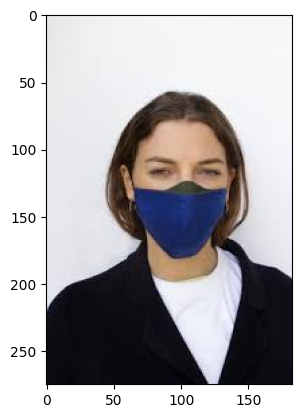

In [23]:
img = mpimg.imread('/content/data/with_mask/with_mask_2956.jpg')
imgplot = plt.imshow(img)
plt.show

B. Without Mask

<function matplotlib.pyplot.show(close=None, block=None)>

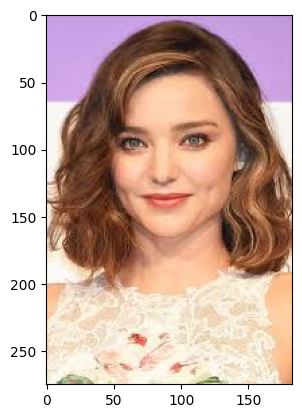

In [24]:
img = mpimg.imread('/content/data/without_mask/without_mask_3058.jpg')
imgplot = plt.imshow(img)
plt.show

Image Processing

In [25]:
with_mask_path = "/content/data/with_mask/"

data=[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
data[0]

array([[[255, 253, 242],
        [255, 255, 244],
        [255, 255, 245],
        ...,
        [246, 230, 214],
        [255, 241, 225],
        [255, 242, 226]],

       [[255, 255, 244],
        [255, 254, 243],
        [249, 246, 235],
        ...,
        [248, 233, 219],
        [240, 227, 213],
        [232, 219, 204]],

       [[247, 244, 233],
        [241, 238, 227],
        [230, 226, 215],
        ...,
        [254, 243, 235],
        [242, 231, 223],
        [232, 222, 212]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [27]:
type(data[0])

numpy.ndarray

In [28]:
X = np.array(data)
Y = np.array(labels)

In [29]:
type(X)

numpy.ndarray

In [30]:
type(Y)

numpy.ndarray

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Splitting of data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Scaling

In [33]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

**Building CNN**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation ='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu',))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [36]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['acc'])

In [37]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs= 5)

Epoch 1/5
170/170 [==============================] - 20s 30ms/step - loss: 0.5099 - acc: 0.7747 - val_loss: 0.2748 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2940 - acc: 0.8832 - val_loss: 0.2391 - val_acc: 0.9157
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2373 - acc: 0.9077 - val_loss: 0.2178 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1963 - acc: 0.9261 - val_loss: 0.2017 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1733 - acc: 0.9327 - val_loss: 0.2263 - val_acc: 0.9256


Model Evaluation

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.1834 - acc: 0.9391
Test Accuracy= 0.939113199710846


Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label ==1:
  print("The person in the picture is not wearing a mask")
else:
  print("The person in the picture is wearing a mask")